In [1]:
#install.packages('NMF', repos='http://cran.us.r-project.org')
library('NMF')
source("https://bioconductor.org/biocLite.R")
biocLite("Biobase", "GEOquery")
library('GEOquery')

Loading required package: pkgmaker
Loading required package: registry

Attaching package: 'pkgmaker'

The following object is masked from 'package:base':

    isNamespaceLoaded

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: windows] | Cores 3/4
Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) 'Biobase'
Warning message:
"package 'Biobase' is in use and will not be installed"Old packages: 'backports', 'broom', 'colorspace', 'data.table', 'digest',
  'forcats', 'GenomeInfoDb', 'ggplot2', 'jsonlite', 'Matrix', 'mgcv', 'nlme',
  'openssl', 'pbdZMQ', 'psych', 'Rcpp', 'rmarkdown', 'rprojroot',
  'rtracklayer', 'selectr', 'shiny', 'stringr', 'tidyr', 'tidyverse', 'xml2',
  'zoo'
Setting options('download.file.method.GEOquery'='auto')
Setting options('GEOquery.inm

In [2]:
gse <- getGEO('GSE21501', GSEMatrix=TRUE)

https://ftp.ncbi.nlm.nih.gov/geo/series/GSE21nnn/GSE21501/matrix/
OK
Found 1 file(s)
GSE21501_series_matrix.txt.gz
File stored at: 
C:\Users\mayars1\AppData\Local\Temp\RtmpuGrAoe/GPL4133.soft
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"not all columns named in 'colClasses' exist"

In [3]:
show(gse)

$GSE21501_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 45220 features, 132 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM535948 GSM535949 ... GSM536949 (132 total)
  varLabels: title geo_accession ... data_row_count (48 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 45220 (45220 total)
  fvarLabels: ID COL ... ORDER (22 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL4133 



In [4]:
#Pull out ExpressionSet object

exprSetGSE <- gse[[1]]
dim(exprSetGSE)
class(exprSetGSE)

Features  Samples 
   45220      132

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

In [5]:
#Adding 1 to all values to prevent negatives

nat <- exprs(exprSetGSE)
nat2 <- 2^nat
nat3 <- nat2 +1
nat4 <- log2(nat3)
head(nat4)

,GSM535948,GSM535949,GSM535950,GSM535951,GSM536032,GSM536033,GSM536034,GSM536035,GSM536036,GSM536037,...,GSM536940,GSM536941,GSM536942,GSM536943,GSM536944,GSM536945,GSM536946,GSM536947,GSM536948,GSM536949
1,2.0986104,1.5929736,2.0657654,1.9367518,3.0840305,1.4019698,2.4504991,1.6901235,2.5808569,1.7924373,...,1.8534091,0.9118681,1.6605868,1.1688542,1.5983266,1.1721886,1.9493306,1.2041725,2.0158068,1.3637457
2,0.7333574,0.8399929,1.0308224,0.9542492,1.0555292,1.4700461,0.9288461,0.5216308,0.5963851,0.5225417,...,1.1883918,1.0196318,0.6274911,1.0790539,0.4545549,0.7912074,1.2166653,0.1668406,0.6890023,0.9875542
3,0.5039829,0.9297959,1.0981256,0.9137435,1.0633318,0.8065142,0.6399327,1.2200867,0.6464072,1.0252166,...,1.0000000,1.4528507,1.2321097,0.5859632,1.0565673,0.7429692,1.7570503,1.2604537,0.7453872,1.4880015
4,0.8259570,1.0901518,1.1039977,0.8177058,1.0441557,0.8937276,0.6958637,1.5439266,0.9412473,0.7798712,...,1.0706494,0.7490254,1.1788759,1.6571702,1.5802996,0.7510524,0.7886776,0.5204183,0.6855914,1.0085250
5,0.8391105,0.8649771,1.0997250,1.0211528,0.9737434,1.2246580,0.4954929,1.2041725,0.8052302,1.0954633,...,1.0000000,0.2864171,0.8904994,0.8537570,0.7575671,1.0451862,0.2235326,0.6264337,0.5231497,1.0550104
6,0.6893821,0.9297959,0.9975022,0.9900347,1.1473307,1.0354245,0.4080790,0.8399929,0.8515259,1.2036066,...,0.8559925,0.6882432,1.4611154,0.8667822,1.1131137,0.4561789,0.7266069,1.2821247,0.5161930,0.1160140


In [10]:

#Nonnegative matrix factorization on dataset.

#K = 14 (factors)
#nrun = 10 (NMF will run ten times and select the run with the lowest loss value)



res <- nmf(nat4, 14, nrun = 10, .opt = "v")

NMF algorithm: 'brunet'
Multiple runs: 10
Mode: parallel (3/4 core(s))


Runs: |==================================================| 100%
System time:
   user  system elapsed 
   0.87    0.69 3658.50 


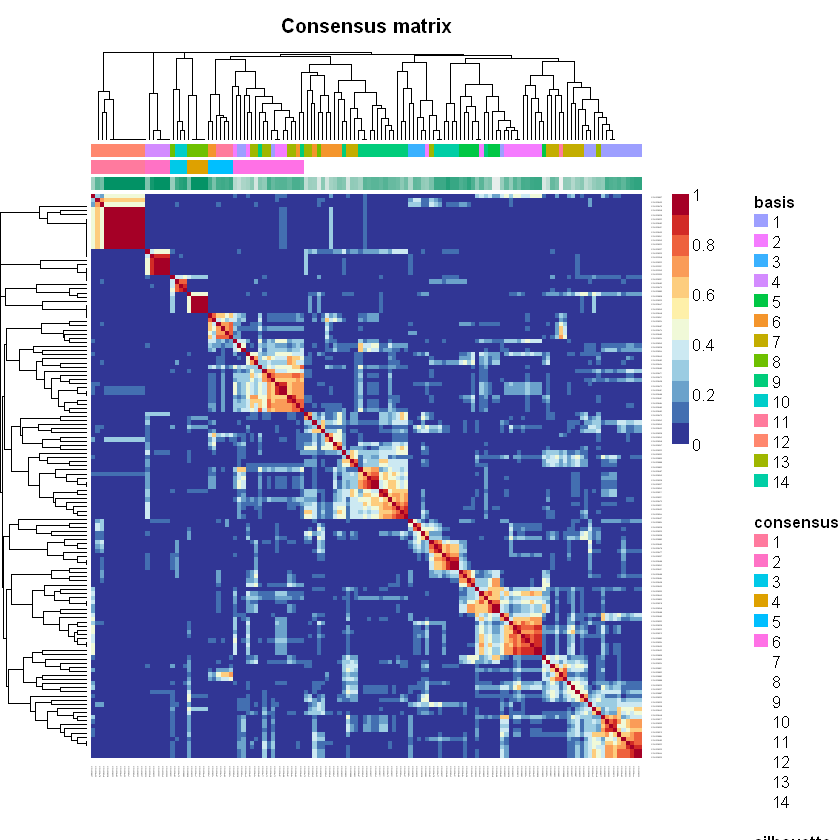

In [11]:
#Vaguely understand what I'm looking at.  No metric for what a "good" consensus looks like though.

consensusmap(res)

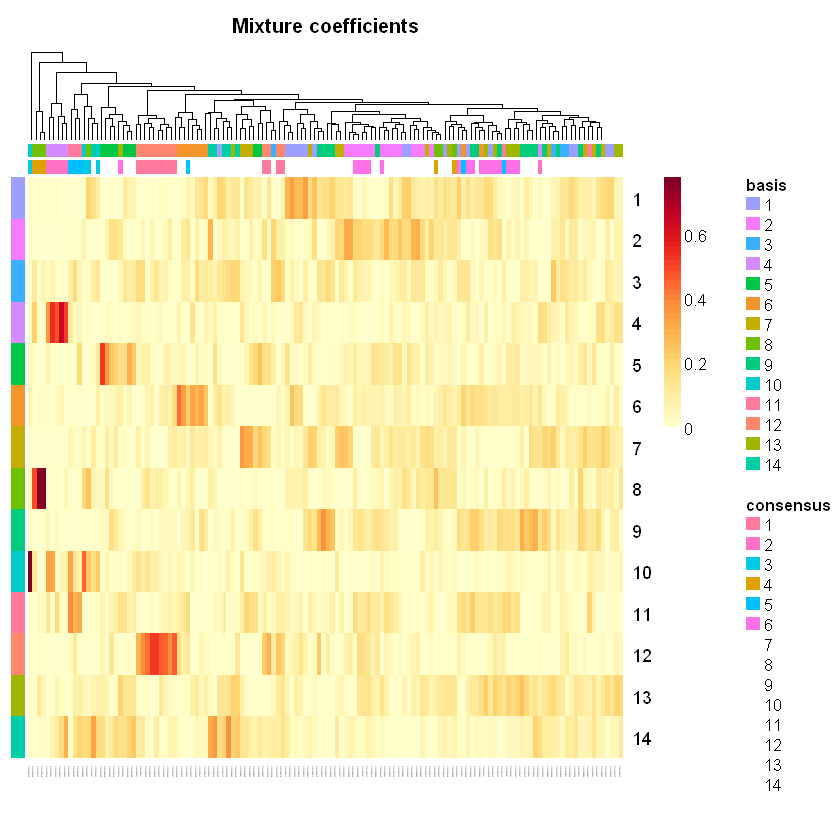

In [12]:

#This is moderately more informative.  Ideally sample of the same group (per phylo tree) would cluster on the same
#factors (vertical axis).  Some of that is in evidence, but still not sure how much better it could be.


coefmap(res)

In [13]:
#Using result from previous nmf run to seed NMF to convergence with alternating least-squares solver.
#This takes a while to run.

res2 = nmf(nat4, 14, method="snmf/l", seed = res)

In [14]:

#NMF factors matrix V into matrices W (weights) and H (basis).

#In this case, S = W (sample loadings) and G = H (gene loadings).


S <- coef(res2)
G <- basis(res2)

dim(S)
dim(G)

[1]  14 132

[1] 45220    14

In [11]:
#Checkpoint

#G <- read.csv('geneLoadings.csv', header=TRUE)
#S <- read.csv('sampleLoadings.csv', header=TRUE)

In [27]:
#Normalize both G and S to make the column means of G = 1

for (i in 1:14){
    colMean <- mean(G[,i])
    G[,i] <- G[,i] / colMean
    S[i,] <- S[i,] * colMean
}

In [47]:
G2 <- G

In [48]:
for (j in 1:14){
    for (i in 1:45220){
        G2[i, j] <- G2[i,j] - max(G[i, -j]) 
    }
}

#G2 is a matrix of differences between gene loading values (G) and the max loading value for that gene (outside of the present)
#column.


In [68]:
#sanity check

print(G[12,12])
print(max(G[12,]))
print(G2[12,12])

[1] 0.2055004
[1] 1.194306
[1] -0.9888051


In [51]:
#G3 is the difference absolute values

G3 <- abs(G2)

In [123]:
topGenes <- mat.or.vec(50,14)

for(i in 1:14){
    topGenes[,i]<-rownames(head(G3[order(G3[,i], decreasing=TRUE),0],50))  
}

In [122]:
topGenes

38087,954,991,33640,33640,33640,33640,33640,6149,33640,33640,38087,38087,33640
991,38087,6149,991,991,991,991,6149,38087,991,6149,6149,43042,991
33640,22493,954,38087,6149,38087,6149,38087,991,38087,991,17637,15132,6149
6149,17637,43042,6149,35093,6149,22493,40820,40820,6149,38087,954,6149,35093
17637,43042,33640,22493,13192,40820,31321,17637,17637,17637,954,22493,38355,34851
35093,6149,17637,13192,38087,22493,17637,22493,33640,954,22493,43042,40820,13192
34851,31321,22493,35093,17637,13572,954,13572,954,35093,17637,13572,954,43311
40820,40820,38087,22708,22708,3403,13192,954,22493,31321,15132,40820,17637,4520
22493,14159,4520,43042,22493,15132,34851,991,43042,13192,40820,38355,13192,17637
43042,13572,35093,954,34851,38355,22708,38355,13572,40820,31321,15132,13572,22708
13192,15132,40820,17637,954,43042,4520,15132,38355,13572,43042,31321,22708,23450
